#### Seminal quality prediction using statndard logistic regression

In [71]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [72]:
col_names = np.array(['season','age','child_diseases','accident',
                      'surgical_intervention','high_fevers', 
                      'alcohol', 'smoking','hrs_sitting','diagnosis'])

data = pd.read_csv("data/fertility_Diagnosis.csv", header=None, names=col_names)
data.dropna(inplace = True)

print("Data dimensionality", data.shape)
data.head()

Data dimensionality (100, 10)


,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [73]:
# Encode the diagnosis to binary form
# Diagnosis: normal (N), altered (O)	
diagnosis = data.iloc[:,-1]

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(diagnosis)

# Review the encoded lables
encoded_compr = pd.DataFrame({'diagnosis': diagnosis, 'encoded_label': encoded_label})
encoded_compr.head()

,diagnosis,encoded_label
0,N,0
1,O,1
2,N,0
3,N,0
4,O,1


<Axes: title={'center': 'Distrbution of diagnosis results'}, xlabel='Diagnosis', ylabel='Frequency'>

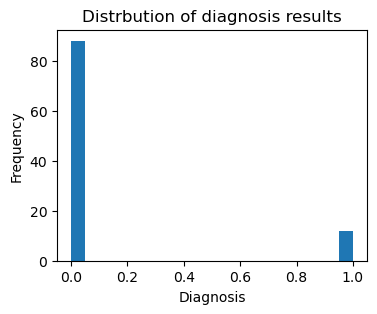

In [74]:
# Distribution of target
distr = pd.DataFrame(encoded_label)
distr.plot.hist(bins=20, 
                figsize=(4,3), 
                xlabel='Diagnosis', 
                legend=False, 
                title='Distrbution of diagnosis results')

Initializing Parameters

In [75]:
X = data.iloc[:,:-1]
Y = encoded_label

X_train, X_test, y_train, y_test= train_test_split(X.to_numpy(), Y, test_size=0.25, random_state=42)

Training the Model

In [76]:
model = LogisticRegression(solver='lbfgs', max_iter=3000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [77]:
# Use the model to make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [78]:
# Determine model accuracy and f1_score
accuracy = metrics.accuracy_score(y_test, y_pred)

Text(0.5, 1.0, 'Accuracy score: 0.88 \n')

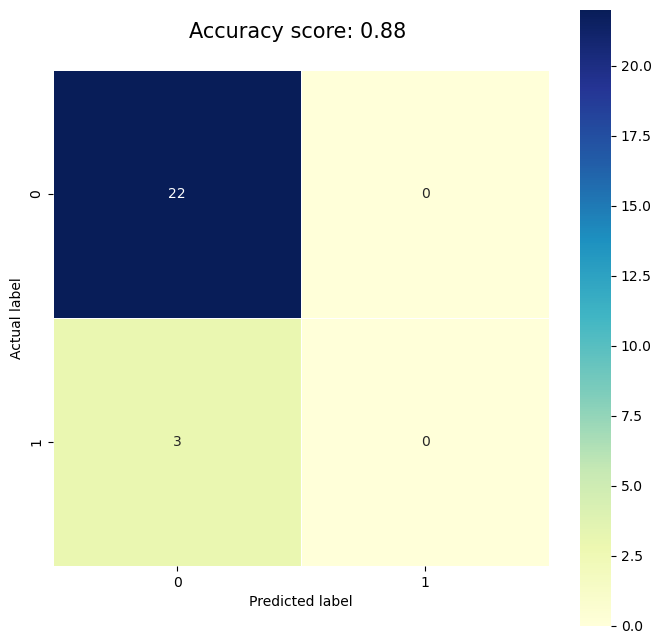

In [79]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, square=True, cmap='YlGnBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy score: {0} \n'.format(accuracy, accuracy), size=15)

Metrics evaluation

In [80]:
accuracy = metrics.accuracy_score(y_test, y_pred)
report = metrics.classification_report(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
log_loss = metrics.log_loss(y_test, y_pred)

print('Accuracy score: {} \n'.format(accuracy))
print('Classification report: \n {}'.format(report))
print('ROC & AUC: {} \n'.format(roc_auc))
print('Log loss: {} \n'.format(log_loss))



Accuracy score: 0.88 

Classification report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       0.00      0.00      0.00         3

    accuracy                           0.88        25
   macro avg       0.44      0.50      0.47        25
weighted avg       0.77      0.88      0.82        25

ROC & AUC: 0.5 

Log loss: 4.325238406694059 



/Users/mzitoh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mzitoh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mzitoh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
